In [3]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import argparse
import numpy as np
import cv2
import matplotlib.gridspec as gridspec
import glob
import os
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
from PIL import Image
from matplotlib import cm
from matplotlib import colors
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

import scipy.stats
from sklearn import mixture

import pandas as pd

In [12]:
def plot(image):
    plt.figure(figsize=(8, 8))
    plt.imshow(image, interpolation='nearest')

In [4]:
def RGB(red,green,blue): return '#%02x%02x%02x' % (red,green,blue)

In [18]:
def colorPixels(img):
    img = cv2.imread(img) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #plt.imshow(img)
    pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
    norm = colors.Normalize(vmin=-1.,vmax=1.)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()
    
    return pixel_colors

In [19]:
def GMM_Cluster_Prob(imgData, clusters):
    
    gmm_ = GaussianMixture(n_components = clusters)
    labels = gmm_.fit_predict(imgData)
    
    centers = np.empty(shape=(gmm_.n_components, imgData.shape[1]))
    
    for i in range(gmm_.n_components):
        density = scipy.stats.multivariate_normal(cov=gmm_.covariances_[i], mean=gmm_.means_[i]).logpdf(imgData)
        centers[i, :] = imgData[np.argmax(density)]
    
    #print("Posterior probability of data belongingness to each Gaussian")  
    probs = gmm_.predict_proba(imgData)
    probs = probs.round(3)
    
    return labels, centers, probs

In [20]:
def plotColorHist(image_newdf):
    clusters = image_newdf["Cluster Labels"].tolist()  
    count    = image_newdf["#Pixels"].tolist()  
    colors   = [ RGB(r, g, b) for r, g, b in zip(image_newdf["Mean R"], image_newdf["Mean G"], image_newdf["Mean B"]) ]

    print("The plot below shows the dominance of clusters interms of their number and color.", colors)

    width = 0.90
    fig, ax = plt.subplots()
    a = ax.bar(clusters, count, width, color = colors) # plot a vals

    plt.show() 

In [21]:
def GenerateProb(prob):
    meanProb = prob.mean(axis = 0)
    print("Mean probability of pixel belongingness to each gaussian cluster.")
    print(meanProb)
    return meanProb

In [25]:
def createDataFrame(image_df):
    image_newdf = pd.DataFrame()
    sortedLabels = sorted(image_df['Cluster Labels'].unique())
    #print("A new Dataframe with Mean R, G, B values and Pixel count grouped by their cluster labels.")
    for label in sortedLabels:
        d = image_df[image_df['Cluster Labels'] == label]
        count = d[0].count()
        temp = pd.DataFrame(
            {
                'Cluster Labels': label,
                '#Pixels': count,
                'Mean R' : int(d[0].mean()),
                'Mean G' : int(d[1].mean()),
                'Mean B' : int(d[2].mean())
            }, index=[0]
        )
        image_newdf = pd.concat([image_newdf, temp])
    
    print(image_newdf) 
    
    return image_newdf

In [26]:
def scatterPlot(centers, reshapedImage, colors):
    fig2 = plt.figure(figsize = (12, 50))
    axis = fig2.add_subplot(4, 1, 1, projection="3d")
    axis.scatter(reshapedImage[:, 0], reshapedImage[:, 1], reshapedImage[:, 2], facecolors= colors, marker=".")
    axis.scatter(centers[:, 0], centers[:, 1], centers[:, 2], marker="o", facecolor ='RED',  s = 200)
    
    plt.show()

# Half-Ripe Mango Clustering Analysis

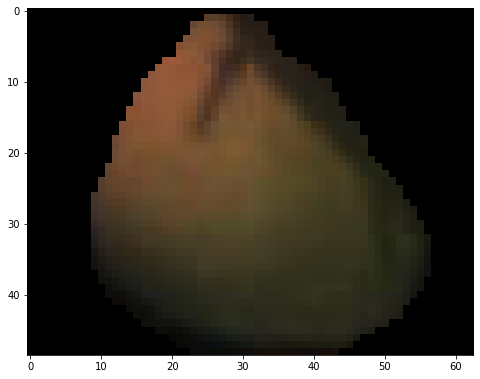

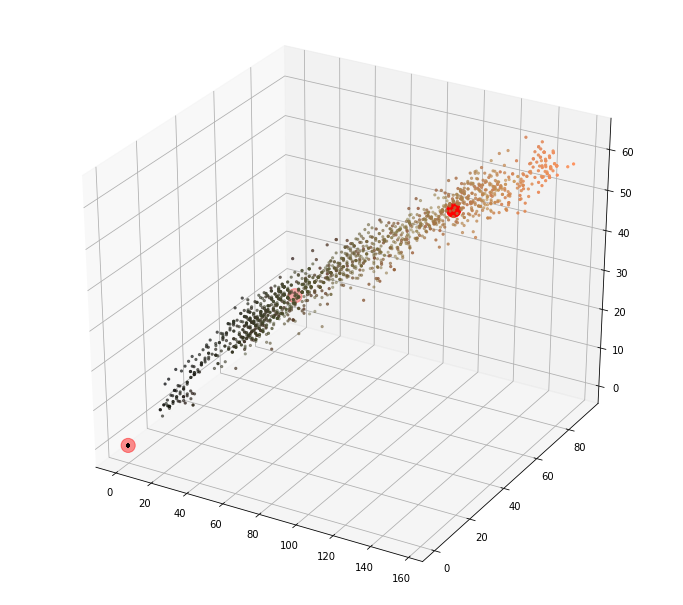

   Cluster Labels  #Pixels  Mean R  Mean G  Mean B
0               0     1445       0       0       0
0               1      668     105      75      45
0               2      974      44      41      26
The plot below shows the dominance of clusters interms of their number and color. ['#000000', '#694b2d', '#2c291a']


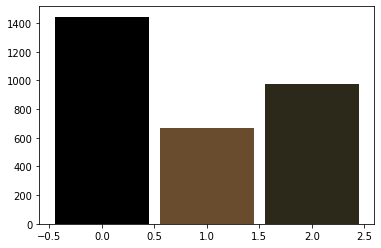

Mean probability of pixel belongingness to each gaussian cluster.
[0.468092   0.22087075 0.31103725]


array([0.468092  , 0.22087075, 0.31103725])

In [27]:
from matplotlib import colors

imagePath = "halfRipe.png"
clusters = 3

mng_img = cv2.imread(imagePath)
mng_img = cv2.cvtColor(mng_img, cv2.COLOR_BGR2RGB)  # COnvert to RGB COlor Space.

plot(mng_img)

mng_img_re = mng_img.reshape((mng_img.shape[0] * mng_img.shape[1], 3))  # Reshape the 3-channel image to cluster

labels, centers, probs = GMM_Cluster_Prob(mng_img_re, clusters)

image_df = pd.DataFrame(mng_img_re) 
# Add the Cluster Labels column to Reshaped Image dataframe
image_df['Cluster Labels']= labels  
# Picks the color pof pixels for scatter plot
colors_ = colorPixels(imagePath)

scatterPlot(centers, mng_img_re, colors_)  
# Creates a New Dataframe with #Pixels corresponding to each cluster and their mean R, G, B values.
image_newdf = createDataFrame(image_df)   
# Plots the n(= clusters) dominant colors in the image.
plotColorHist(image_newdf)
# Generates the mean probability that a pixel belongs to a cluster
GenerateProb(probs)



# Ripe Mango Clustering Analysis

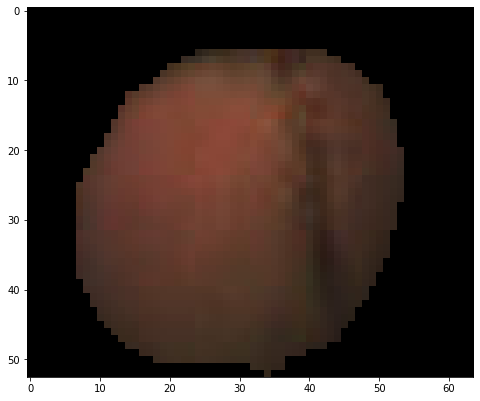

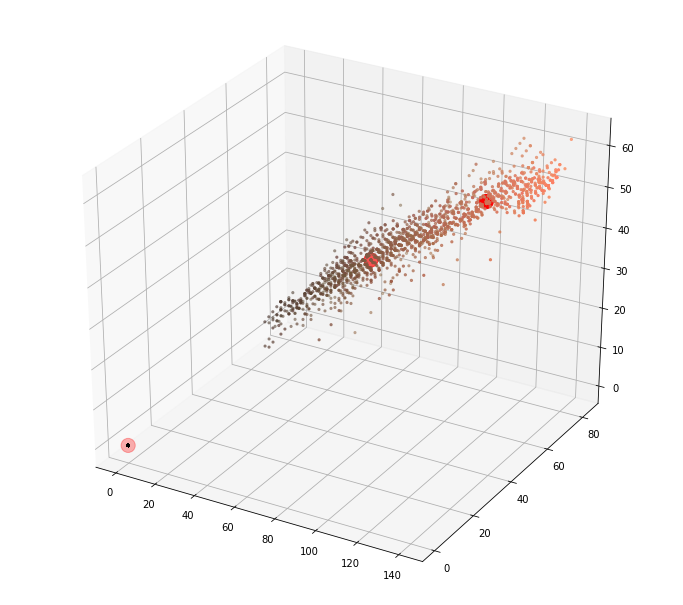

   Cluster Labels  #Pixels  Mean R  Mean G  Mean B
0               0     1633       0       0       0
0               1      650     114      66      50
0               2     1109      71      48      36
The plot below shows the dominance of clusters interms of their number and color. ['#000000', '#724232', '#473024']


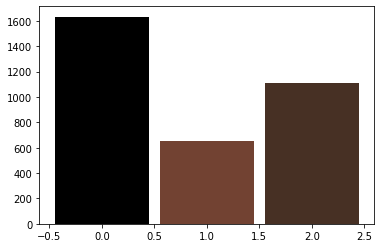

Mean probability of pixel belongingness to each gaussian cluster.
[0.48142689 0.2006763  0.31789682]


array([0.48142689, 0.2006763 , 0.31789682])

In [35]:
from matplotlib import colors

imagePath = "fullyRipe.png"
clusters = 3

mng_img = cv2.imread(imagePath)
mng_img = cv2.cvtColor(mng_img, cv2.COLOR_BGR2RGB)  # COnvert to RGB COlor Space.

plot(mng_img)

mng_img_re = mng_img.reshape((mng_img.shape[0] * mng_img.shape[1], 3))  # Reshape the 3-channel image to cluster

labels, centers, probs = GMM_Cluster_Prob(mng_img_re, clusters)

image_df = pd.DataFrame(mng_img_re) 
# Add the Cluster Labels column to Reshaped Image dataframe
image_df['Cluster Labels']= labels  
# Picks the color pof pixels for scatter plot
colors_ = colorPixels(imagePath)

scatterPlot(centers, mng_img_re, colors_)  
# Creates a New Dataframe with #Pixels corresponding to each cluster and their mean R, G, B values.
image_newdf = createDataFrame(image_df)   
# Plots the n(= clusters) dominant colors in the image.
plotColorHist(image_newdf)
# Generates the mean probability that a pixel belongs to a cluster
GenerateProb(probs)


# Raw Mango Clustering Analysis

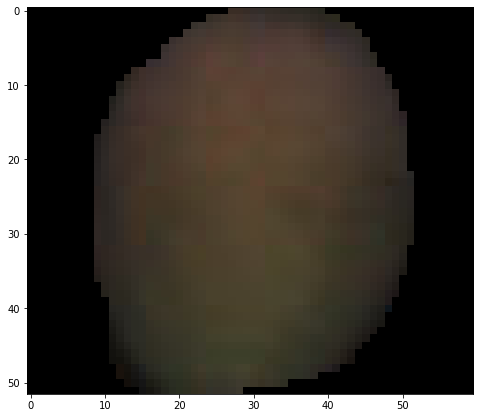

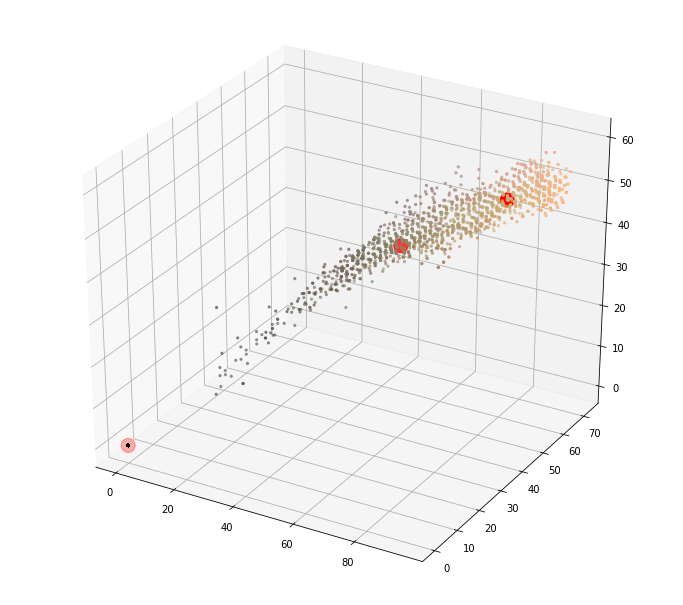

   Cluster Labels  #Pixels  Mean R  Mean G  Mean B
0               0      896      52      45      37
0               1     1240       0       0       0
0               2      984      78      63      46
The plot below shows the dominance of clusters interms of their number and color. ['#342d25', '#000000', '#4e3f2e']


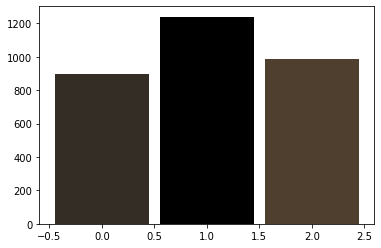

Mean probability of pixel belongingness to each gaussian cluster.
[0.299675  0.3974359 0.3028891]


array([0.299675 , 0.3974359, 0.3028891])

In [36]:
from matplotlib import colors

imagePath = "Raw.png"
clusters = 3

mng_img = cv2.imread(imagePath)
mng_img = cv2.cvtColor(mng_img, cv2.COLOR_BGR2RGB)  # COnvert to RGB COlor Space.

plot(mng_img)

mng_img_re = mng_img.reshape((mng_img.shape[0] * mng_img.shape[1], 3))  # Reshape the 3-channel image to cluster

labels, centers, probs = GMM_Cluster_Prob(mng_img_re, clusters)

image_df = pd.DataFrame(mng_img_re) 
# Add the Cluster Labels column to Reshaped Image dataframe
image_df['Cluster Labels']= labels  
# Picks the color pof pixels for scatter plot
colors_ = colorPixels(imagePath)

scatterPlot(centers, mng_img_re, colors_)  
# Creates a New Dataframe with #Pixels corresponding to each cluster and their mean R, G, B values.
image_newdf = createDataFrame(image_df)   
# Plots the n(= clusters) dominant colors in the image.
plotColorHist(image_newdf)
# Generates the mean probability that a pixel belongs to a cluster
GenerateProb(probs)

# 3D Scatter Plots in 4 color spaces.

In [43]:
def colorPixels(img):
    img = cv2.imread(img) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
    norm = colors.Normalize(vmin=-1.,vmax=1.)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()
    
    return pixel_colors
    

In [50]:
def showScatterPlot(imgPath, colors):
    
    colorSpace = [cv2.COLOR_BGR2RGB, cv2.COLOR_BGR2LAB, cv2.COLOR_BGR2YCrCb, cv2.COLOR_BGR2HSV]
    cs_string = ["R G B", "L A B", "Y Cr Cb", "H S V"]
    num = 1
    
    for cs in colorSpace:
        
        mng = cv2.imread(imgPath)
        mng = cv2.cvtColor(mng, cs)
        
        #show(mng)
        r, g, b = cv2.split(mng)
        fig = plt.figure(figsize = (15, 50))
        axis = fig.add_subplot(4, 1, num, projection="3d")
        #fig.add_subplot(4, 1, num, projection="3d")
        
        axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors= colors, marker=".")
        labelList = cs_string[num - 1].split()
        axis.set_xlabel(labelList[0])
        axis.set_ylabel(labelList[1])
        axis.set_zlabel(labelList[2])
        plt.show()
        
        num = num + 1

# Raw Mango - Scatterplot 

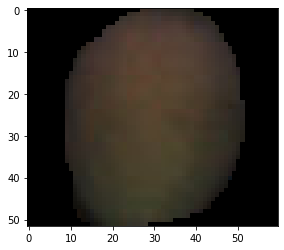

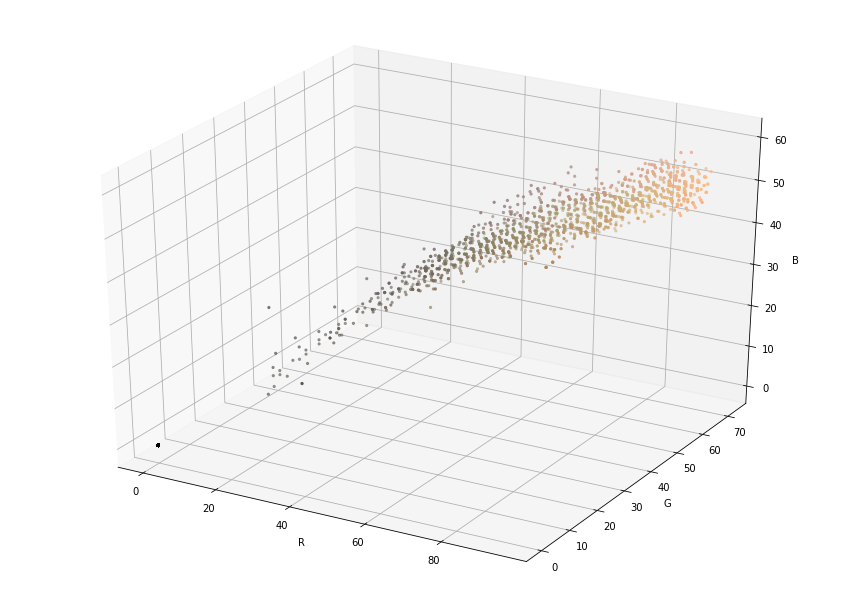

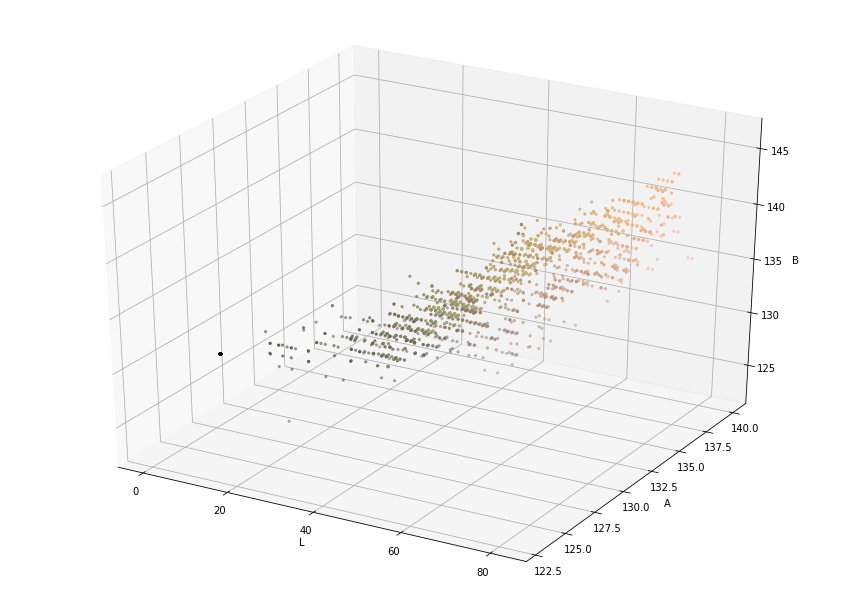

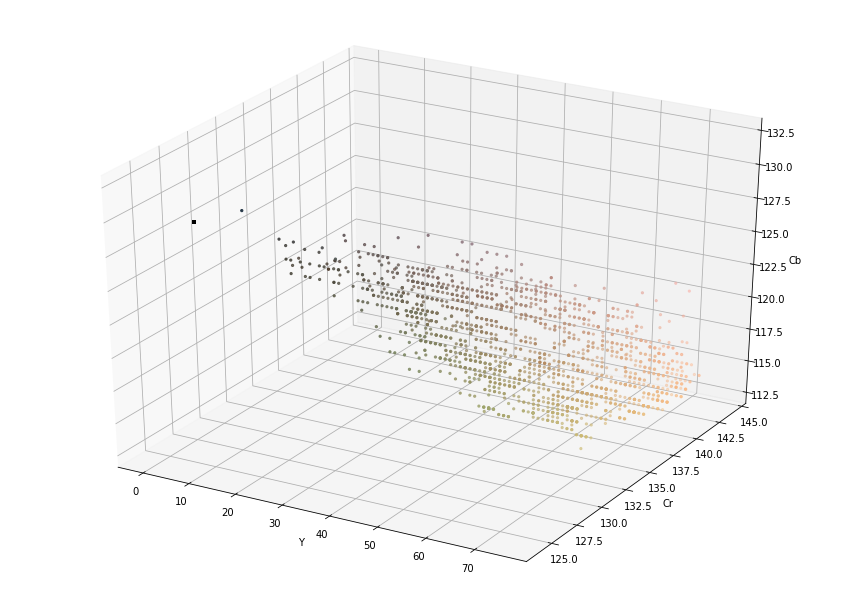

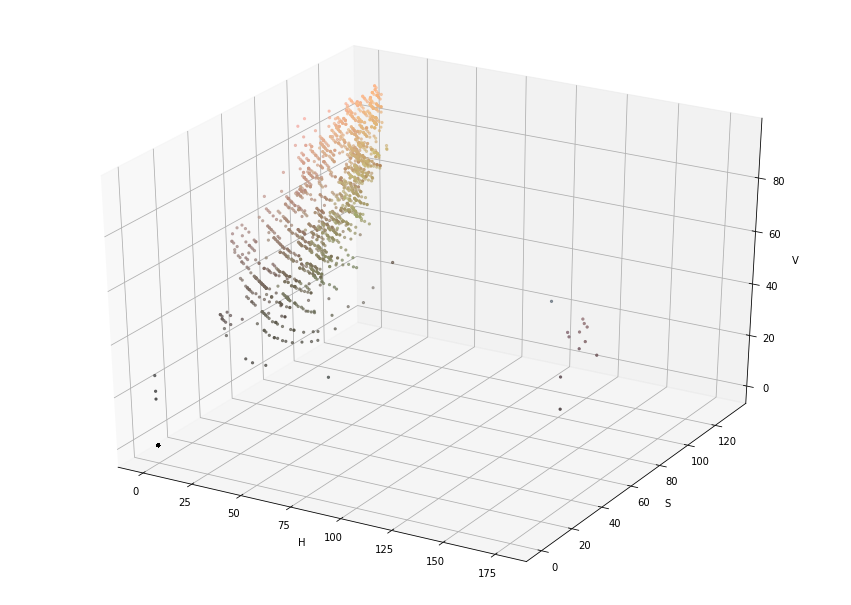

In [55]:
image = "Raw.png"
pixels_color = colorPixels(image)
showScatterPlot(image, pixels_color)

# Ripe Mango - Scatter plot 


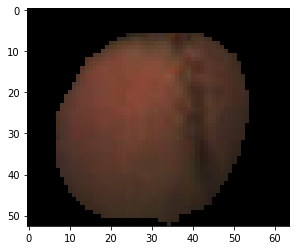

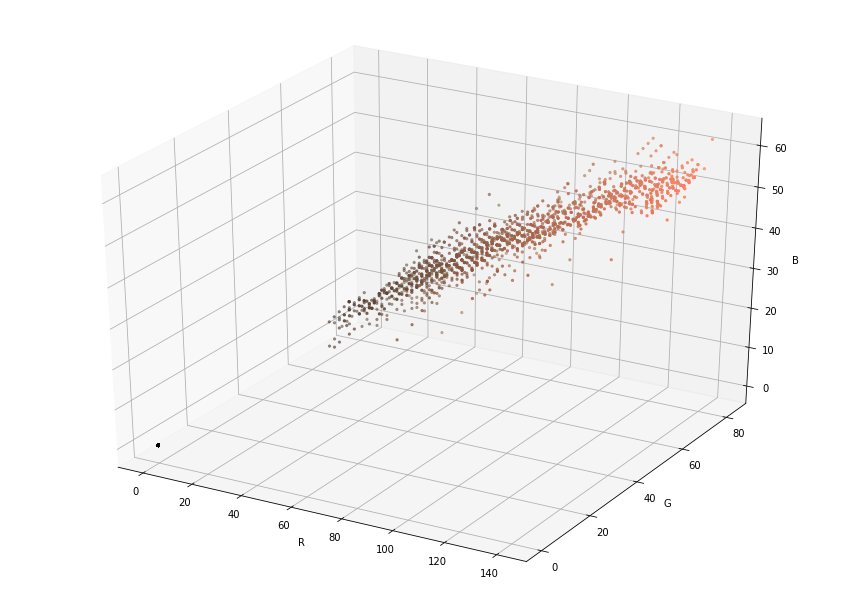

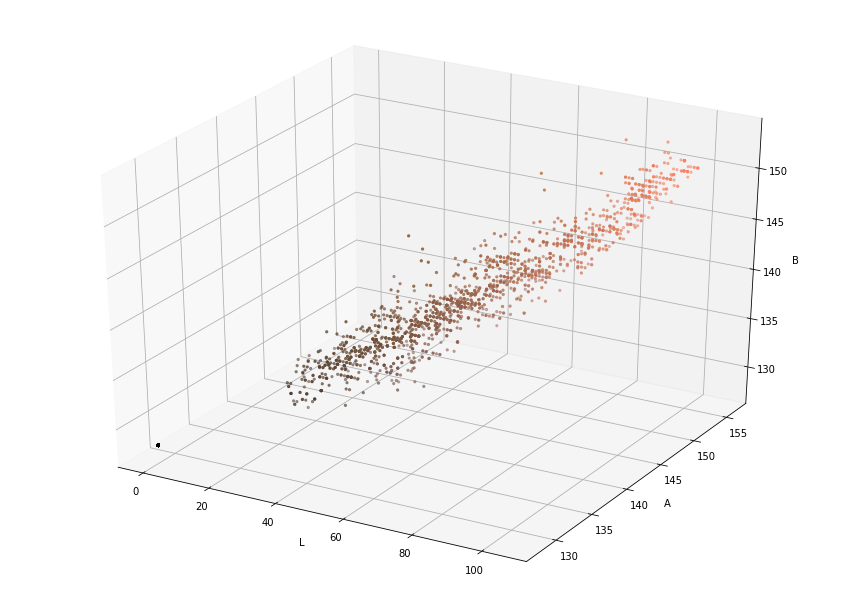

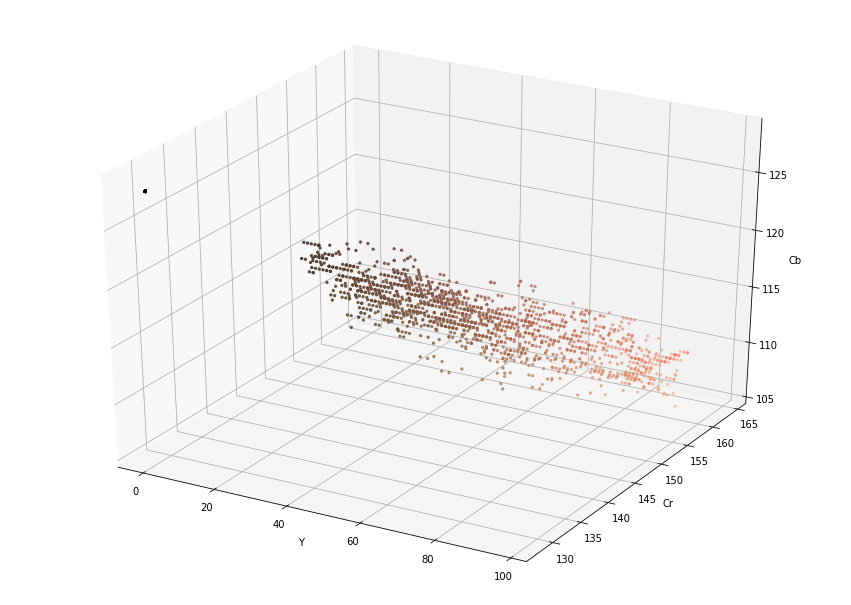

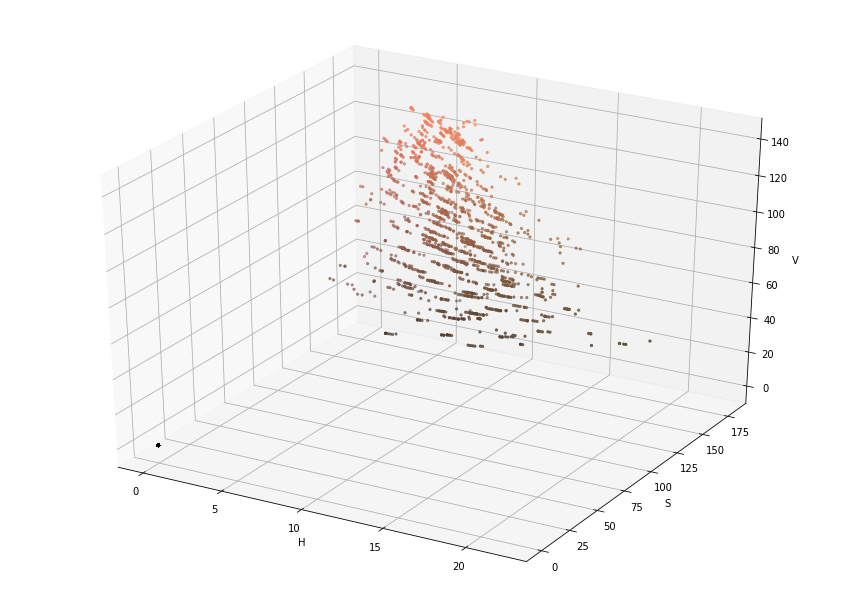

In [54]:
image = "fullyRipe.png"
pixels_color = colorPixels(image)
showScatterPlot(image, pixels_color)

# Half-Ripe Mango - Scatter plot 

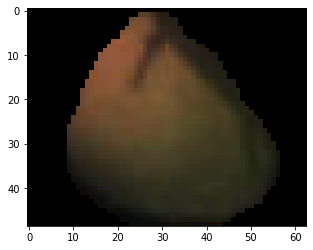

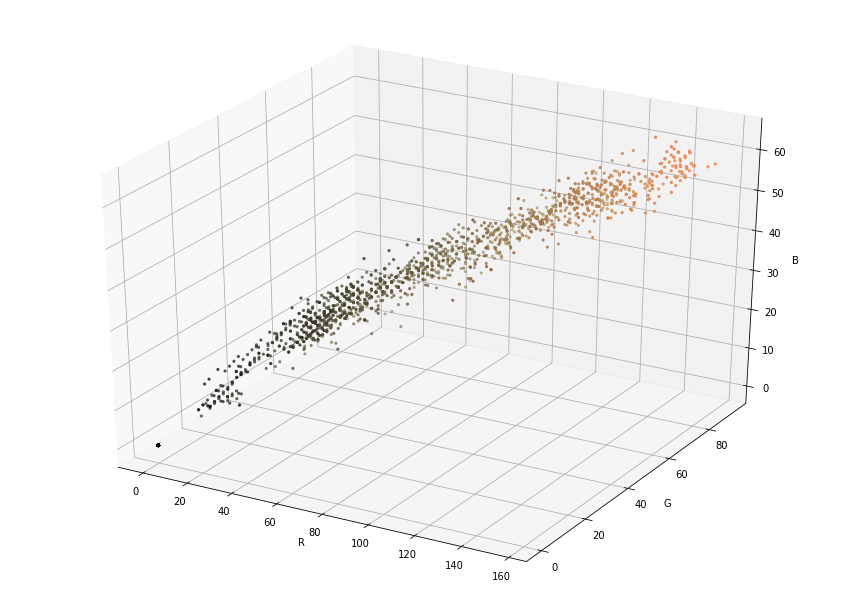

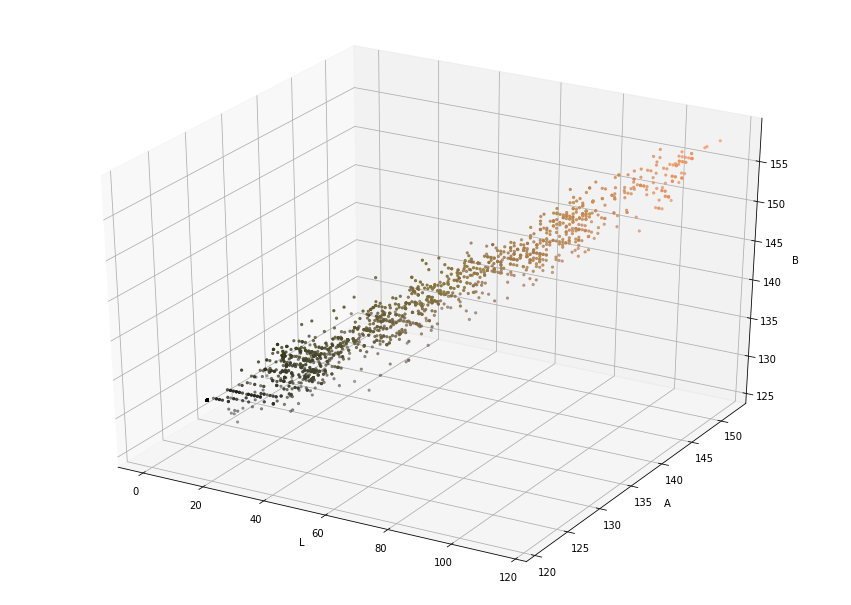

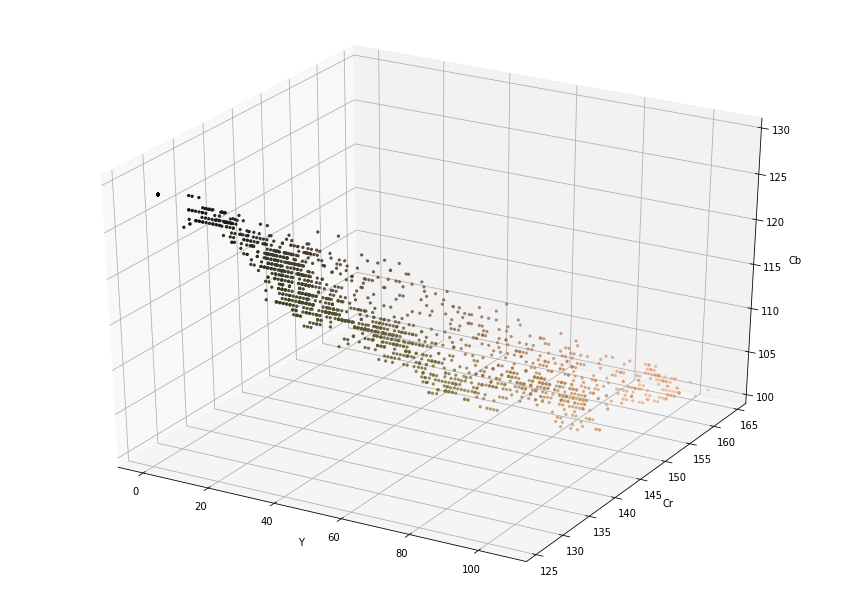

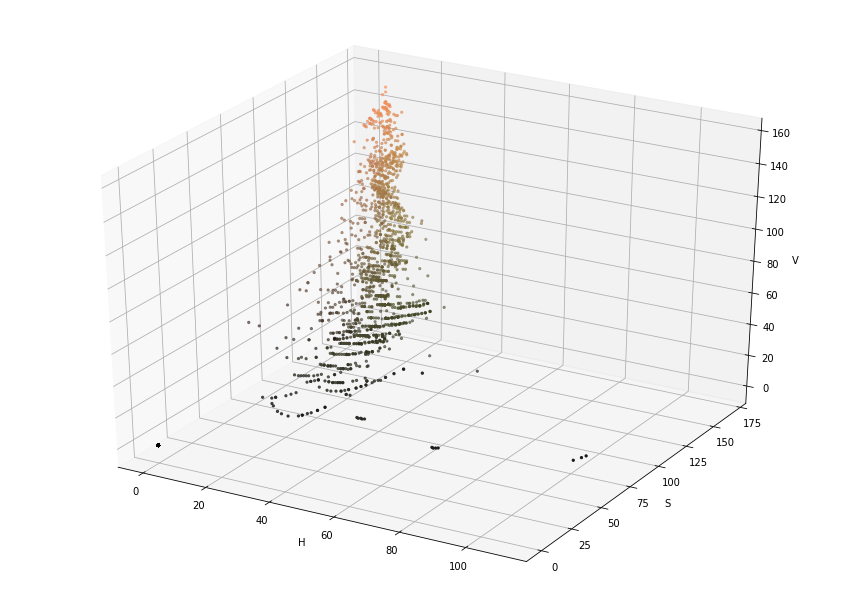

In [56]:
pixels_color = colorPixels("halfRipe.png")
showScatterPlot("halfRipe.png", pixels_color)

# Edge Detection

In [3]:
def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)
	# return the edged image
	return edged

In [6]:
%cd ..

/Users/pavankumar/Documents/Robotics MSc/Dissertation/Fruit-Detection-in-Orchards/Ripeness Analysis


(39, 37, 3)


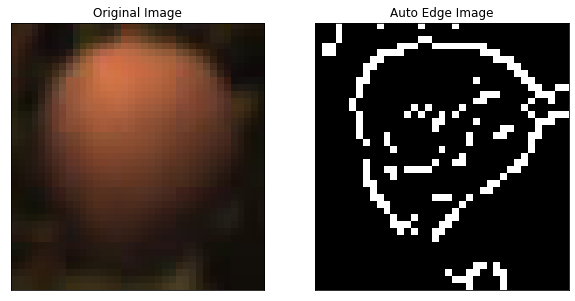

'/Users/pavankumar/Documents/Robotics MSc/Dissertation/Fruit-Detection-in-Orchards/Ripeness Analysis'

In [7]:
folder = "Ripen" 
imagePath = "img_1_10_0_Mangos.jpg (1).jpg"
#imagePath = "nemo0.jpg" 
os.chdir(folder)

image = cv2.imread(imagePath) 
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)

# apply Canny edge detection using a wide threshold, tight
# threshold, and automatically determined threshold
wide = cv2.Canny(blurred, 10, 200)
tight = cv2.Canny(blurred, 225, 250)
auto = auto_canny(blurred)

print(image_rgb.shape)

fig2 = plt.figure(figsize = (10,10))
plt.subplot(121),plt.imshow(image_rgb)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(auto, cmap = "gray")
plt.title('Auto Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

os.chdir("..")
%pwd